<a href="https://colab.research.google.com/github/GiovaniMicheloni/mlearning-w-python/blob/main/base_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRE PROCESSAMENTO BASE DE DADOS DO CENSO


In [1]:
!pip -q install plotly

In [2]:
!pip -q install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_censu = pd.read_csv('/content/census.csv')

In [6]:
base_censu


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
base_censu.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
base_censu.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
np.unique(base_censu['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

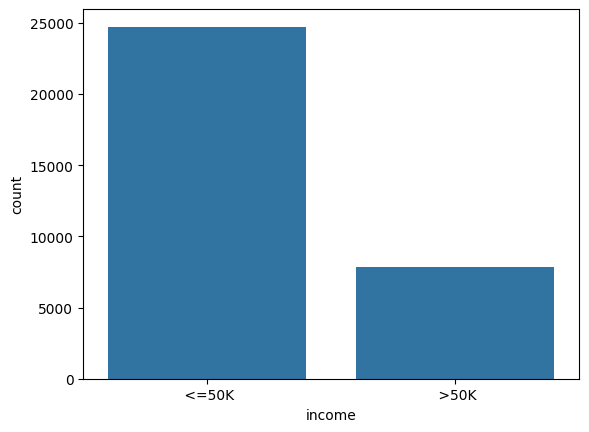

In [10]:
sns.countplot(x = base_censu['income']);

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

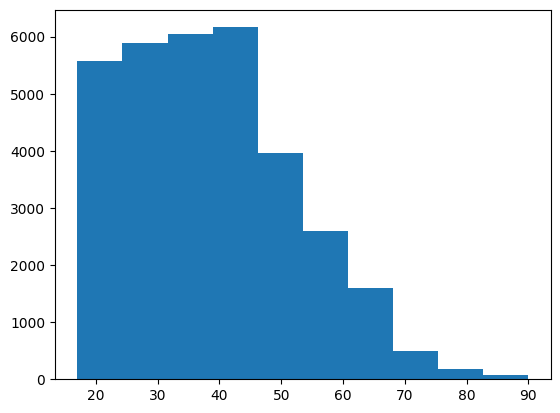

In [11]:
plt.hist(base_censu['age'])

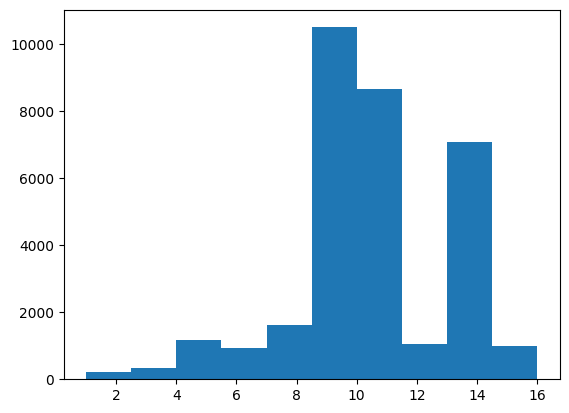

In [12]:
plt.hist(x = base_censu['education-num']);

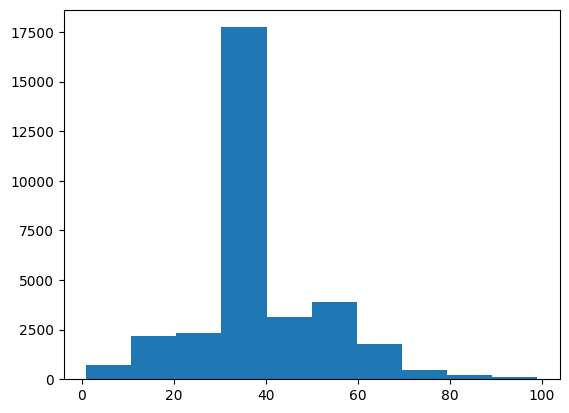

In [13]:
plt.hist(x = base_censu['hour-per-week']);

In [14]:
grafico = px.treemap(base_censu, path = ['workclass'])
grafico.show()

In [15]:
grafico = px.treemap(base_censu, path = ['occupation', 'income'])
grafico.show()

In [16]:
grafico = px.treemap(base_censu, path = ['education-num', 'income'])
grafico.show()

<Axes: xlabel='sex', ylabel='hour-per-week'>

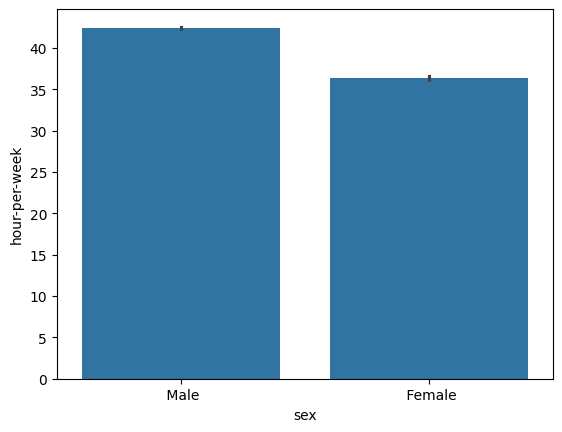

In [17]:
sns.barplot(x= base_censu['sex'], y= base_censu['hour-per-week'])

In [18]:
grafico = px.parallel_categories(base_censu, dimensions=['occupation', 'relationship'])
grafico.show()

In [19]:
grafico = px.parallel_categories(base_censu, dimensions=['workclass','occupation', 'income'])
grafico.show()

In [20]:
base_censu.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [21]:
x_censu = base_censu.iloc[:, 0:14].values

In [22]:
x_censu

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [23]:
x_censu[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [24]:
y_censu = base_censu.iloc[:,14].values

In [25]:
y_censu

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

TRATAMENTO DE ATRIBUTOS CATEGORICOS (transformar as categorias string em numeros com labelenconder e onehotencoder)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder_test = LabelEncoder()

In [28]:
x_censu[:,1] #workclass

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [29]:
teste = label_encoder_test.fit_transform(x_censu[:,1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [30]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [31]:
x_censu[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [32]:
x_censu[:,1] = label_encoder_workclass.fit_transform(x_censu[:,1])
x_censu[:,3] = label_encoder_education.fit_transform(x_censu[:,3])
x_censu[:,5] = label_encoder_marital.fit_transform(x_censu[:,5])
x_censu[:,6] = label_encoder_occupation.fit_transform(x_censu[:,6])
x_censu[:,7] = label_encoder_relationship.fit_transform(x_censu[:,7])
x_censu[:,8] = label_encoder_race.fit_transform(x_censu[:,8])
x_censu[:,9] = label_encoder_sex.fit_transform(x_censu[:,9])
x_censu[:,13] = label_encoder_country.fit_transform(x_censu[:,13])

In [33]:
x_censu[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [34]:
x_censu

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

onehot encoder

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
len(np.unique(base_censu['occupation']))

15

In [37]:
from sklearn.compose import ColumnTransformer

In [38]:
onehotenconder_censu = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [39]:
x_censu = onehotenconder_censu.fit_transform(x_censu).toarray()

In [40]:
x_censu

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [41]:
x_censu[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [42]:
x_censu.shape

(32561, 108)

escalonamento dos valores

In [43]:
from sklearn.preprocessing import StandardScaler
scaler_censu = StandardScaler()
x_censu = scaler_censu.fit_transform(x_censu)

In [44]:
x_censu[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

divisao das bases em treinamento e teste

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
x_censu_treinamento, x_censu_teste, y_censu_treinamento, y_censu_teste = train_test_split(x_censu, y_censu, test_size = 0.15, random_state = 0)


In [47]:
x_censu_treinamento.shape, y_censu_treinamento.shape

((27676, 108), (27676,))

In [48]:
x_censu_teste.shape, y_censu_teste.shape

((4885, 108), (4885,))

In [49]:
import pickle

In [50]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_censu_treinamento, y_censu_treinamento, x_censu_teste, y_censu_teste], f)

In [52]:
with open('census.pkl', mode = 'rb') as f:
  x_censu_treinamento, y_censu_treinamento, x_censu_teste, y_censu_teste = pickle.load(f)

In [53]:
x_censu_treinamento.shape, y_censu_treinamento.shape

((27676, 108), (27676,))

In [54]:
x_censu_teste.shape, y_censu_teste.shape

((4885, 108), (4885,))

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
naive_census = GaussianNB()

In [58]:
naive_census.fit(x_censu_treinamento,y_censu_treinamento)

GaussianNB()

In [59]:
previsoes = naive_census.predict(x_censu_teste)

In [60]:
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [62]:
y_censu_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_censu_teste, previsoes)

0.4767656090071648

Apenas 47%, em base_census2, fizemos a previsão sem fazer escalonamento na base de dados e chegamos numa maior taxa de previsão

In [68]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

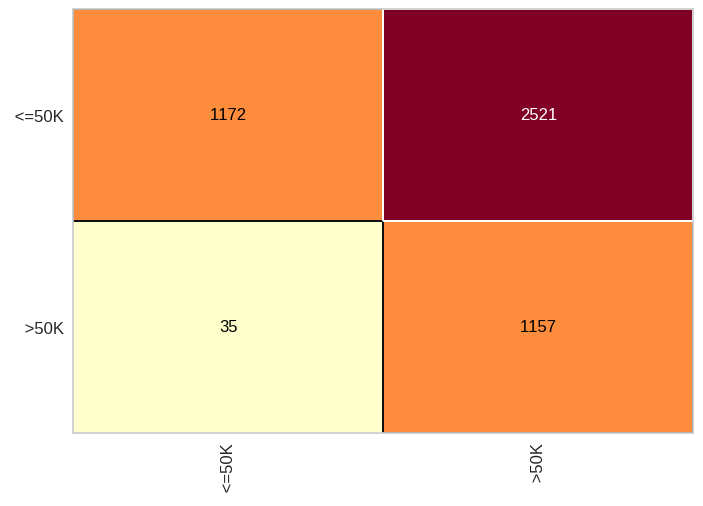

In [69]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_censu_treinamento,y_censu_treinamento)
cm.score(x_censu_teste,y_censu_teste )